# 「ベイズ推論による機械学習入門」P.58 ディリクレ分布

* 定義
$$Dir(\mathbf{\pi}|\mathbf{\alpha}) = C_D(\mathbf{\alpha})\prod_{k=1}^{K}\pi_k^{\alpha_k-1}$$

* パラメータ
$$\mathbf{\pi} = (\pi_1,...,\pi_K)^{T}$$
$$\sum_{k=1}^{K}\pi_k = 1 \quad \pi_k \in (0,1)$$
$$\mathbf{\alpha} = (\alpha_1,...,\alpha_k)$$
$$C_D(\mathbf{\alpha}) = \frac{\Gamma(\sum_{k=1}^{K}\alpha_k)}{\prod_{k=1}^{K}\Gamma(\alpha_k)}$$

* 対数表示
$$lnDir(\mathbf{\pi}|\mathbf{\alpha}) = \sum_{k=1}^{K}(\alpha_k-1)ln\pi_k + lnC_D(\mathbf{\alpha})$$

### ディリクレ分布

In [10]:
using SpecialFunctions: gamma

const Γ = gamma

function Dir(π_array, α_array)
    norm = Γ(sum(α_array)) / prod(Γ.(α_array))
    norm * prod(π_array .^ (α_array .- 1))
end

Dir (generic function with 1 method)

### パラメータの設定を変えた時の確率密度のグラフ

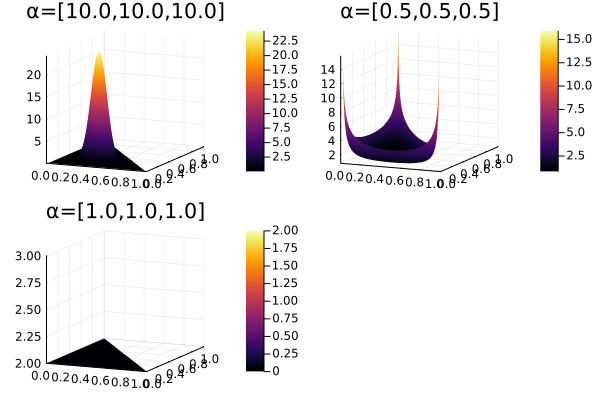

In [21]:
# 確立密度の計算
function prob(N, α_array)
    xs = range(0, 1, length=N)
    ys = range(0, 1, length=N)
    zs = zeros(N, N)
    for (i, x) in enumerate(xs)
        for (j, y) in enumerate(ys)
            z = 1 - (x + y)
            if z >= 0
                zs[i, j] = Dir([x, y, z], α_array)
            end
        end
    end
    zs
end

# α = [10.0,10.0,10.0]の場合
α_1 = [10.0, 10.0, 10.0]
prob_1 = prob(100, α_1)
prob_1[prob_1 .== 0] .= NaN

# α = [0.5,0.5,0.5]の場合
α_2 = [0.5, 0.5, 0.5]
prob_2 = prob(100, α_2)
prob_2[prob_2 .== 0] .= NaN

# α = [1.0,1.0,1.0]の場合
α_3 = [1.0, 1.0, 1.0]
prob_3 = prob(100, α_3)
prob_3[prob_3 .== 0] .= NaN

# 作図
using Plots

π1_array = range(0, 1, length=100)
π2_array = range(0, 1, length=100)

plot(surface(π1_array, π2_array, prob_1, title="α=[10.0,10.0,10.0]"),
    surface(π1_array, π2_array, prob_2, title="α=[0.5,0.5,0.5]"),
    surface(π1_array, π2_array, prob_3, title="α=[1.0,1.0,1.0]"))